In [46]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot

## Getting a dataset



In [47]:
#setup training data
train_data = datasets.FashionMNIST(
    root="data", #locn to download data
    train=True, #tranining dataset?
    download=True, #download?
    transform=torchvision.transforms.ToTensor(), #how to transform the data
    target_transform=None #how to transform the labels
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


In [48]:
len(train_data), len(test_data)

(60000, 10000)

In [49]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [50]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [52]:
#shape
image.shape,label

(torch.Size([1, 28, 28]), 9)

### Vizualize data


Image Shape: torch.Size([1, 28, 28])


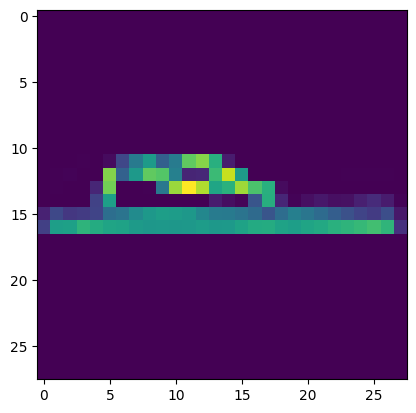

In [53]:
import matplotlib.pyplot as plt
image,label=train_data[10999]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())

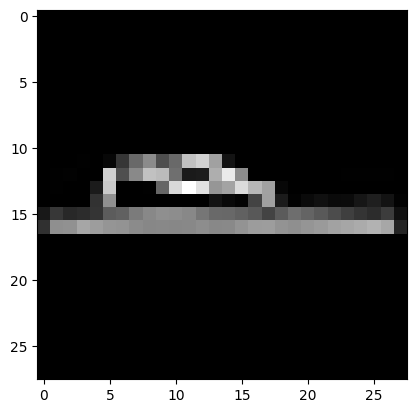

In [54]:
plt.imshow(image.squeeze(),cmap='gray')

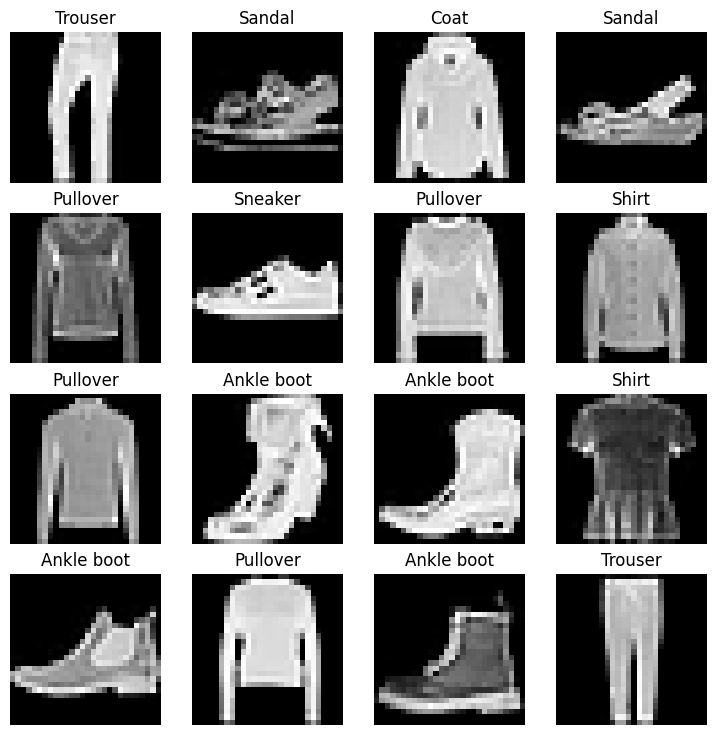

In [55]:
# torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoader

Pytorch Datasets to Python Iterable (more specifically batches or mini-batches)

In [56]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [57]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

In [58]:
len(train_dataloader)

1875

In [59]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape

torch.Size([32, 1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

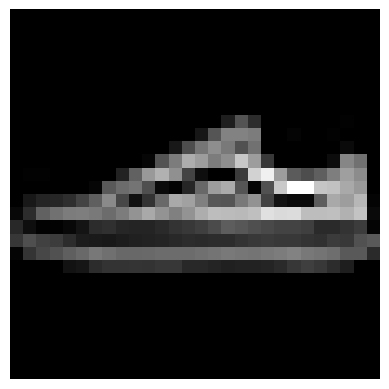

In [60]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)


## Build a baseline model

In [61]:
#create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x=train_features_batch[0]

#flatten the sample
output = flatten_model(x)

print(f"shape before flattening: {x.shape}")
print(f"shape after flattening: {output.shape}")



shape before flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])


In [62]:
from torch import nn
class FashionMNIST(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape))
  def forward(self,x):
      return self.layer_stack(x)

In [63]:
torch.manual_seed(42)
model0=FashionMNIST(input_shape=784,hidden_units=10,output_shape=len(class_names))
model0

FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [64]:
dummy_x=torch.rand([1,1,28,28])
model0(dummy_x).shape

torch.Size([1, 10])

In [65]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Loss optimizer

In [66]:
# nn.crossentropyloss
# optimizer - stochastic gd

import requests
from pathlib import Path
#Download helper function
if Path("helper_functions.py").is_file():
  print("Helper function already exist")
else:
  print("Downloading...")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

Downloading...


In [67]:
#import acc function

from helper_function import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),lr=0.1)

### Creating function to time experiments

In [68]:
from timeit import default_timer as timer
def print_train_time(start:float, end: float, device: torch.device=None):
  """Prints difference between start and end time"""
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds ")
  return total_time

In [69]:
start_time=timer()
#some code
end_time=timer()
print_train_time(start_time,end_time)

Train time on None: 0.000 seconds 


2.4391000124523998e-05

### Creating training loop and train model on batches

In [70]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu=timer()
epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_loss=0
  for batch,(X,y) in enumerate(train_dataloader):
    model0.train()
    y_pred=model0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss/=len(train_dataloader)
  test_loss,test_acc=0,0
  model0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model0(X_test)
      test_loss+=loss_fn(test_pred,y_test)
      test_acc+=accuracy_fn(y_test,test_pred.argmax(dim=1))
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc}")

train_time_end_on_cpu = timer()
total_train_time = print_train_time(train_time_start_on_cpu,train_time_end_on_cpu,"cpu")





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.03873801916933
Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.19688498402556
Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.42651757188499
Train time on cpu: 26.457 seconds 


## Make Predictions

In [71]:
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn,device: torch.device):
  """Returns a dictionary containing the results of model predicting on data loder"""
  loss,acc=0,0
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      y_pred=model(X)
      #accumulate the loss and acc values per batch
      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y,y_pred.argmax(dim=1))
    loss/= len(data_loader)
    acc/=len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model0.to(device)
model0results = eval_model(model0,test_dataloader,loss_fn,accuracy_fn,device)
model0results



{'model_name': 'FashionMNIST',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Decive Agnostic Code

In [72]:
torch.cuda.is_available()

True

In [73]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Model with nonlinearity

In [74]:
class FashionMNISTv1(nn.Module):
  def __init__(self, input_shape: int,hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)


In [75]:
#create an instance of model1
torch.manual_seed(42)
model1=FashionMNISTv1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)
next(model1.parameters()).device
model1.to(device)

FashionMNISTv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [76]:
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [77]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training with model trying to learn on data_loader"""
  train_loss,train_acc = 0,0
  model.train()

  for batch,(X,y) in enumerate(data_loader):
      X,y=X.to(device),y.to(device)
      model.train()
      y_pred=model(X)
      loss=loss_fn(y_pred,y)
      train_loss+=loss
      train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train Loss: {train_loss:.5f} Train acc: {train_acc:.5f}")


In [78]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y,test_pred.argmax(dim=1))
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss: {test_loss} Test Acc: {test_acc}%\n")


In [79]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model1,train_dataloader,loss_fn,optimizer,accuracy_fn,device)
  test_step(model1,test_dataloader,loss_fn,accuracy_fn,device)
train_time_end_on_gpu=timer()
total_train_time=print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,device)





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 1.09199 Train acc: 61.34333
Test loss: 0.9563649296760559 Test Acc: 64.99600638977635%

Epoch: 1
Train Loss: 0.78101 Train acc: 71.92833
Test loss: 0.7222670912742615 Test Acc: 73.91174121405751%

Epoch: 2
Train Loss: 0.67027 Train acc: 75.93667
Test loss: 0.6850008964538574 Test Acc: 75.01996805111821%

Train time on cuda: 29.379 seconds 


Some times the training time in GPU>CPU because
1. It could be due to overhead for copying the data/model to and from GPU outweighs the compute benefits offered by GPU

2. The hardware using has a better CPU than GPU

In [80]:
model1results=eval_model(model1,test_dataloader,loss_fn,accuracy_fn,device)
model1results

{'model_name': 'FashionMNISTv1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Building a CNN

In [97]:
class FashionMNISTv2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units * 7 * 7, output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x


In [98]:
image.shape

torch.Size([1, 28, 28])

In [99]:

torch.manual_seed(42)
model2=FashionMNISTv2(1,10,len(class_names)).to(device)



## Stepping through nn.conv2d

In [100]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape: {images.shape}")
print(f"Single image shape {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [101]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0
                    )
conv_output=conv_layer(test_image)
conv_output

tensor([[[-2.8778e-01, -6.0596e-02, -5.6306e-02,  ...,  2.8654e-01,
           6.6224e-01, -2.3216e-01],
         [-9.8911e-01, -4.0099e-01,  4.1832e-01,  ...,  4.7459e-01,
          -1.8552e-01, -5.7622e-01],
         [-4.1340e-02, -2.3277e-01,  3.7418e-01,  ...,  2.8255e-02,
           1.4923e-01,  1.4236e-01],
         ...,
         [-8.0374e-01, -7.6687e-01, -5.9457e-02,  ...,  1.7452e-01,
           4.2594e-01, -4.8341e-01],
         [-1.4512e-01, -1.1566e-01,  6.1783e-01,  ...,  2.4126e-01,
          -3.6626e-01,  3.5645e-01],
         [ 3.6096e-02,  1.5214e-01,  2.3123e-01,  ...,  3.0904e-01,
          -4.9680e-01, -7.2258e-01]],

        [[-1.0853e+00, -1.6079e+00,  1.3346e-01,  ...,  2.1698e-01,
          -1.7643e+00,  2.5263e-01],
         [-8.2507e-01,  6.3866e-01,  1.8845e-01,  ..., -1.0936e-01,
           4.8068e-01,  8.4869e-01],
         [ 6.4927e-01, -4.2061e-03, -4.9991e-01,  ...,  5.8356e-01,
           2.4611e-01,  6.6233e-01],
         ...,
         [ 9.8860e-02,  1

### Setting up loss function and optimizer

In [102]:
from helper_function import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model2.parameters(),
                          lr=0.1)

In [103]:
#training and testing model2 using functions


In [104]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model2=timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n------")
  train_step(model2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(model2,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)
train_time_end_model2=timer()
total_train_time_model2=print_train_time(train_time_start_model2,train_time_end_model2,device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
------
Train Loss: 0.59538 Train acc: 78.42833
Test loss: 0.37616291642189026 Test Acc: 86.29193290734824%

Epoch 1
------
Train Loss: 0.35636 Train acc: 87.14500
Test loss: 0.3530064821243286 Test Acc: 87.06070287539936%

Epoch 2
------
Train Loss: 0.31970 Train acc: 88.52000
Test loss: 0.31847208738327026 Test Acc: 88.74800319488818%

Train time on cuda: 35.455 seconds 


In [105]:
model2_results=eval_model(
    model2,
    test_dataloader,
    loss_fn,
    accuracy_fn,
    device
)
model2_results

{'model_name': 'FashionMNISTv2',
 'model_loss': 0.31847208738327026,
 'model_acc': 88.74800319488818}

In [107]:
import pandas as pd
compare_results = pd.DataFrame([model0results,model1results,model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNIST,0.476639,83.426518
1,FashionMNISTv1,0.685001,75.019968
2,FashionMNISTv2,0.318472,88.748003
